In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers
 
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
SEED_VALUE = 42
 
# Fix seed to make training deterministic.
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [4]:
# Load the Boston housing dataset.
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
 
print(X_train.shape)
print("\n")
print("Input features: ", X_train[0])
print("\n")
print("Output target: ", y_train[0])

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(404, 13)


Input features:  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


Output target:  15.2


In [5]:
boston_features = {
    'Average Number of Rooms':5,
}
 
X_train_1d = X_train[:, boston_features['Average Number of Rooms']]
print(X_train_1d.shape)
 
X_test_1d = X_test[:, boston_features['Average Number of Rooms']]

(404,)


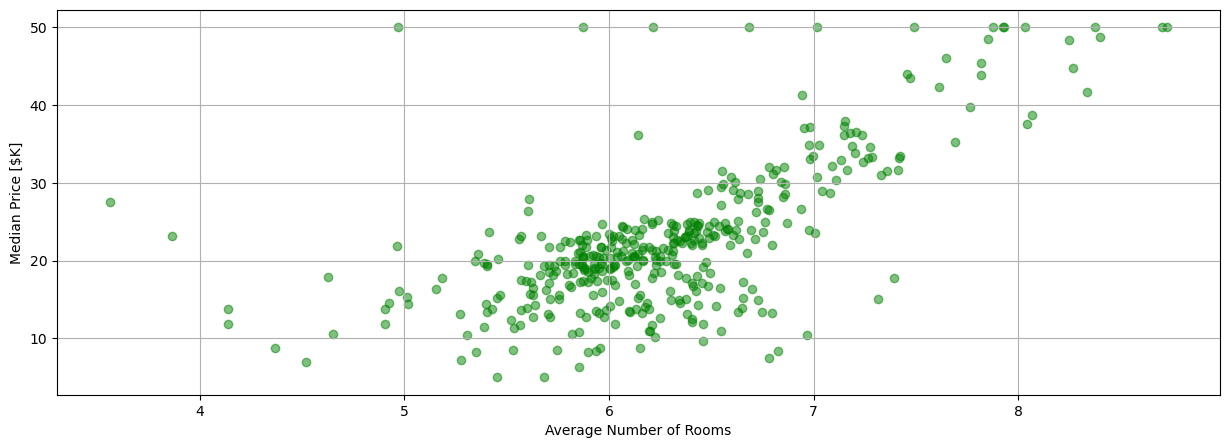

In [6]:
plt.figure(figsize=(15, 5))
 
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Price [$K]')
plt.grid("on")
plt.scatter(X_train_1d[:], y_train, color='green', alpha=0.5);

In [7]:
model = Sequential()
 
# Define the model consisting of a single neuron.
model.add(Dense(units=1, input_shape=(1,)))
 
# Display a summary of the model architecture.
model.summary()

D:\Anaconda\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.005), loss='mse')

In [9]:
history = model.fit(X_train_1d, 
                    y_train, 
                    batch_size=16, 
                    epochs=101, 
                    validation_split=0.3)

Epoch 1/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 287.5318 - val_loss: 374.1715
Epoch 2/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 263.4343 - val_loss: 351.9959
Epoch 3/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 245.1838 - val_loss: 331.3705
Epoch 4/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 228.1450 - val_loss: 311.6837
Epoch 5/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 211.9740 - val_loss: 292.8504
Epoch 6/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 196.6209 - val_loss: 274.8568
Epoch 7/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 182.0766 - val_loss: 257.6996
Epoch 8/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 168.3374 - val_loss: 241.3772
Epoch 9/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 155.4004 - val_loss: 225.8881
Epoch 10/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 143.2624 - val_loss: 211.2303
Epoch 11/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 131.9196 - val_loss: 197.4019
Epoch 12/101
18/18

Epoch 68/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.6812 - val_loss: 75.6959
Epoch 69/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.6747 - val_loss: 75.6847
Epoch 70/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.6683 - val_loss: 75.6735
Epoch 71/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.6618 - val_loss: 75.6623
Epoch 72/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.6554 - val_loss: 75.6512
Epoch 73/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.6489 - val_loss: 75.6400
Epoch 74/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.6424 - val_loss: 75.6289
Epoch 75/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 48.6360 - val_loss: 75.6178
Epoch 76/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.6295 - val_loss: 75.6067
Epoch 77/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.6230 - val_loss: 75.5957
Epoch 78/101
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 48.6166 - val_loss: 75.5846
Epoch 79/101
18/18 ━━━━━━━━━━━━━

In [10]:
def plot_loss(history):
    plt.figure(figsize=(20,5))
    plt.plot(history.history['loss'], 'g', label='Training Loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
    plt.xlim([0, 100])
    plt.ylim([0, 300])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

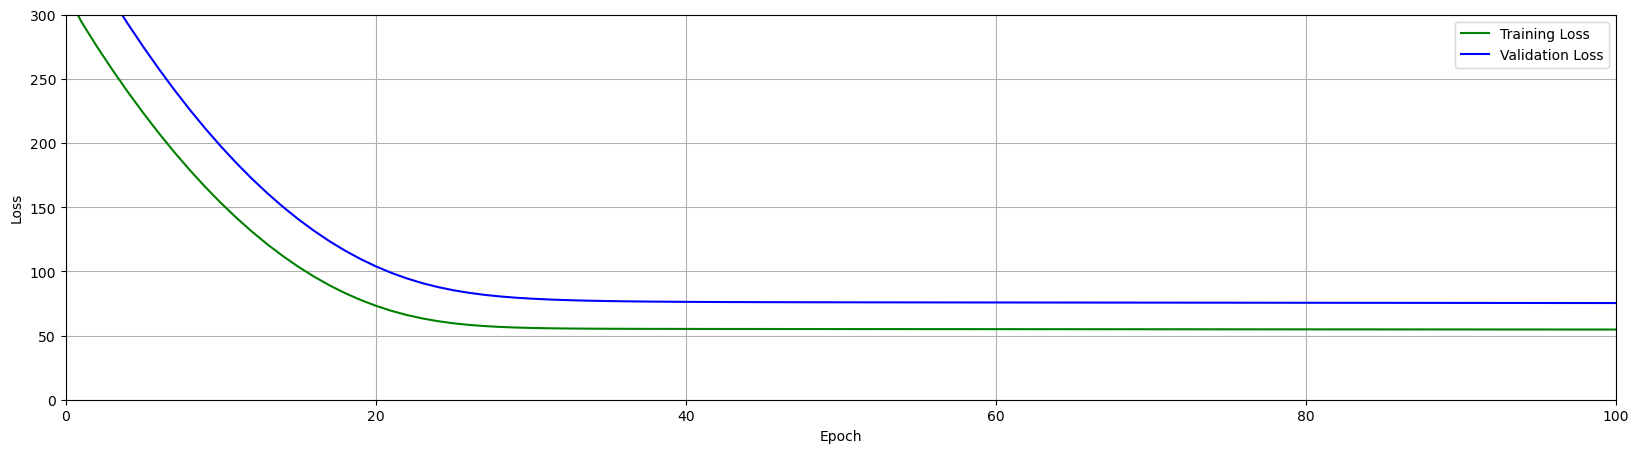

In [11]:
plot_loss(history)


In [15]:
x = np.array([3, 4, 5, 6, 7])
y_pred = model.predict(x)

# Print the predicted prices
for idx in range(len(x)):
    print("Predicted price of a home with {} rooms: ${}K".format(x[idx], int(y_pred[idx]*10)/10))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicted price of a home with 3 rooms: $11.4K
Predicted price of a home with 4 rooms: $14.7K
Predicted price of a home with 5 rooms: $18.0K
Predicted price of a home with 6 rooms: $21.3K
Predicted price of a home with 7 rooms: $24.6K


In [16]:
# Generate feature data that spans the range of interest for the independent variable.
x = tf.linspace(3, 9, 10)
 
# Use the model to predict the dependent variable.
y = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [17]:
def plot_data(x_data, y_data, x, y, title=None):
    plt.figure(figsize=(15,5))
    plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
    plt.plot(x, y, color='k', label='Model Predictions')
    plt.xlim([3,9])
    plt.ylim([0,60])
    plt.xlabel('Average Number of Rooms')
    plt.ylabel('Price [$K]')
    plt.title(title)
    plt.grid(True)
    plt.legend()

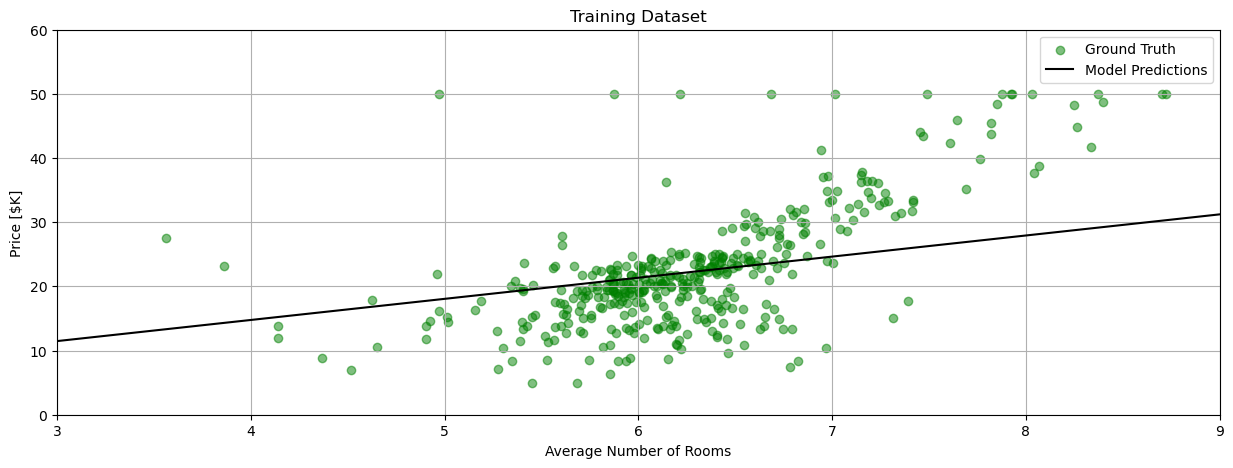

In [18]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')


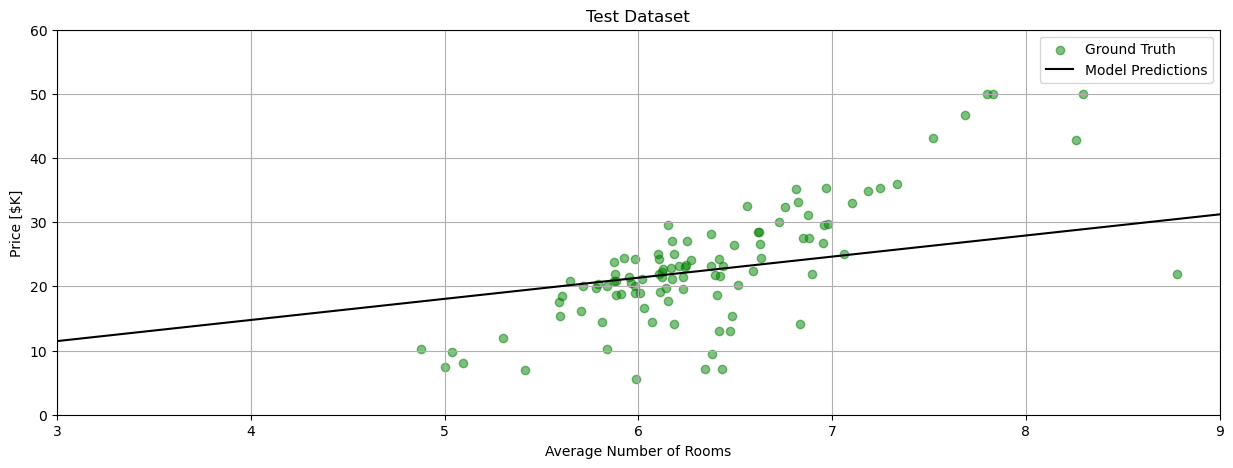

In [19]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')